Nama : Abd Salam At Taqwa

Sumber dataset : https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

#Laporan Proyek Machine Learning - Abd Salam At Taqwa

##Domain Proyek

###Latar Belakang

Pola makan dalam kehidupan seseorang harus lebih diperhatikan karena pola makan yang tidak sehat dapat menyebabkan berbagai macam penyakit, salah satunya adalah obesitas. Obesitas merupakan suatu kondisi dimana lemak menumpuk atau berlebihan sehingga dapat berdampak buruk bagi kesehatan. Kegagalan untuk segera mengatasi obesitas dapat meningkatkan risiko penyakit jantung, tekanan darah tinggi, dan diabetes.

Suatu cara untuk mengatasi obesitas adalah menjaga dan memonitor pola makan dan aktifitas kondisi fisik dalam kehidupan sehari-hari. Ada beberapa faktor yang mempengaruhi pola makan seseorang, diantaranya adalah Frekuensi konsumsi makanan berkalori tinggi (FAVC), Frekuensi konsumsi sayuran (FCVC), Jumlah makanan utama (NCP), Konsumsi makanan di antara waktu makan (CAEC), Konsumsi air setiap hari (CH20), dan Konsumsi alkohol (CALC).

Selain dari pola makan faktor-faktor yang terkait pada kondisi fisik adalah: Pemantauan konsumsi kalori (SCC), Frekuensi aktivitas fisik (FAF), Waktu penggunaan menggunakan perangkat teknologi (TUE), Transportasi yang digunakan (MTRANS), variabel lain yang diperoleh adalah: Jenis Kelamin, Usia, Tinggi dan Berat Badan.

Faktor-faktor pola makan dan kondisi fisik tersebut perlu di perhatikan lebih baik untuk mencegah obesitas. Apabila faktor tersebut tidak diperhatikan dapat dengan mudah mengalami obesitas tanpa disadari. Oleh karena itu perlunya sebuah model yang dapat memprediksi obesitas seseorang berdasarkan faktor-faktor atau atribut tersebut. Hal ini dapat memudahkan manusia untuk memonitoring dan mencegah atau memperbaiki lebih awal ketika pola makan dan kondisi fisik tidak baik.


##Business Understanding

Proyek ini dibangun untuk mengatur pola makan dan kondisi fisik seseorang untuk mencegah obesitas. Data dari pola makan dan kondisi fisik dapat digunakan untuk memprediksi tingkatan dari obesitas seseorang. Hasil dari prediksi obesitas dapat dijadikan sebagai acuan untuk mengatur atau memperbaiki pola makan dan kondisi fisik sebelum penyakit obesitas bertambah parah.

##Problem Statements

Menjelaskan pernyataan masalah latar belakang:

* Faktor atau fitur apa yang paling mempengaruhi obesitas seseorang?
* Bagaimana karakteristik obesitas seseorang dengan pola makan dan kondisi fisik tertentu?

##Goals
* Mengetahui faktor yang paling berpengaruh terhadap obesitas seseorang
* Membangun sebuah model yang dapat memprediksi tingkat obesitas seseorang berdasarkan riwayat pola makan dan kondisi fisik seseorang

## Solution statements

* Melakukan Exploratory Data Analysis terhadap semua faktor atau variabel untuk menemumak varibel yang paling berpengaruh terhadap penentuan tingkat obesitas seseorang
* Membangun 3 model machine learning sederhana dan memilih yang terbaik untuk memprediksi obesitas berdasarkan riwayat pola makan dan kondisi fisik

##Data Understanding & Removing Outlier

Dataset yang digunakan dalam proyek ini merupakan data pola makanan dan kondisi fisik yang memiliki kriteria tingkat obesitasnya masing-masing. Dataset ini sudah tersedia dan dapat diunduh pada [UCI Machine learning](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition).

In [1]:
# menginstall package ucimlrepo
!pip install ucimlrepo

In [2]:
# Mengimport librari yang ucimlrepo yang telah diinstall sebelumnya
from ucimlrepo import fetch_ucirepo


In [3]:
support2 = fetch_ucirepo(id=544)
# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

# metadata
print(support2.metadata)

{'uci_id': 544, 'name': 'Estimation of obesity levels based on eating habits and physical condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [4]:
# variable information
print(support2.variables)

                              name     role         type demographic  \
0                           Gender  Feature  Categorical      Gender   
1                              Age  Feature   Continuous         Age   
2                           Height  Feature   Continuous        None   
3                           Weight  Feature   Continuous        None   
4   family_history_with_overweight  Feature       Binary        None   
5                             FAVC  Feature       Binary        None   
6                             FCVC  Feature      Integer        None   
7                              NCP  Feature   Continuous        None   
8                             CAEC  Feature  Categorical        None   
9                            SMOKE  Feature       Binary        None   
10                            CH2O  Feature   Continuous        None   
11                             SCC  Feature       Binary        None   
12                             FAF  Feature   Continuous        

Berikut informasi pada dataset :

* Dataset memiliki format CSV (Comma-Seperated Values).
* Dataset memiliki 2111 sample dengan 16 fitur.
* Dataset memiliki 4 fitur bertipe categorical 6 fitur bertipe data continuous, 4 bertipe data binary, dan 2 tipe data integer.
* Tidak ada missing value dalam dataset.

##Variable - variable pada dataset

* Gender : Jenis kelamin
* Age : Umur  
* Height : Tinggi badan
* Weight : Berat badan
* family_history_with_overweight : riwayat keluarga dengan kelebihan berat badan
* FAVC : Sering konsumsi makanan berkalori tinggi
* FCVC : Frekuensi konsumsi sayuran
* NCP  : Jumlah makanan utama
* CAEC : Konsumsi makanan di antara waktu makan
* SMOKE : Perokok atau tidak merokok
* CH2O : Konsumsi air setiap hari
* SCC  : Pemantauan konsumsi kalori
* FAF : Frekuensi aktivitas fisik
* TUE  : Waktu menggunakan perangkat teknologi
* CALC : Konsumsi alkohol
* MTRANS : Transportasi yang digunakan
* NObeyesdad  : Label tingkat obesitas

## Exploratory Data Analysis

### Assessing Data

In [5]:
# Mengimport librari yang dibutuhkan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# Melihat informasi dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
# Berdasarkan hasil diatas perlunya mengubah tipe data objek pada fitur-fitur tersebut menjadi tipe data kategori


In [8]:
# Melihat jumlah nilai null pada masing-masing kolom
X.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [9]:
# Melihat deskripsi data untuk menganalisis penyebaran data masing-masing fitur dengan tipe data integeruntuk melihat apakah ada anomali data
# Berdasarkan hasil didapatkan bahwa tidak terdapat data anomali atau data tidak jelas pada dataset
X.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


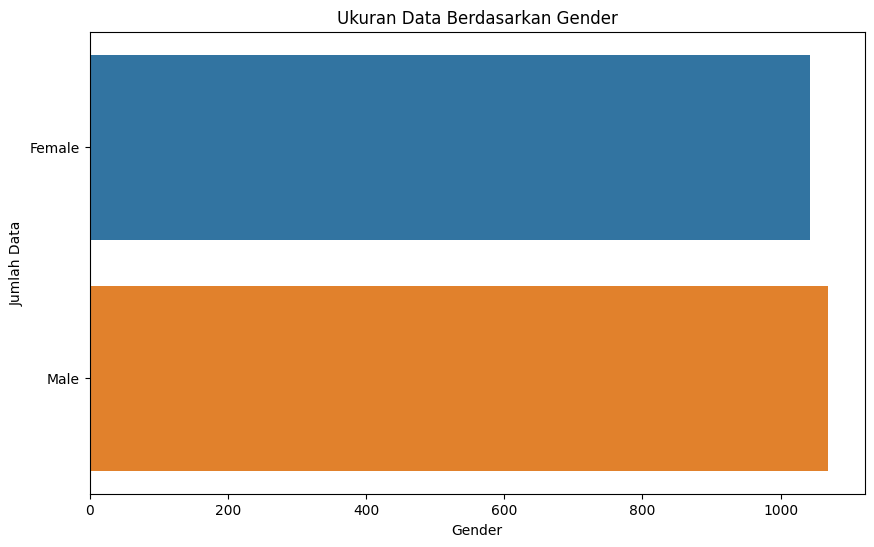

In [10]:
# Visualisasi jenis kelamin yang dominan pada data untuk melihat ukuran data berdasarkan gender
plt.figure(figsize=(10,6))
sns.countplot(
    y="Gender",
    # order=X["Gender"].value_counts().index,
    data=X)

plt.title('Ukuran Data Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Data')
plt.show()

Berdasarkan hasil visualisasi diatas dapat dilihat bahwa data termasuk seimbang karena data laki-laki dan perempuan memiliki ukuran yang hampir sama

## Data Preparation

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
to_cat = X.loc[:, X.nunique() < 8].columns
to_cat

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [13]:
# Mengkonfersi data-data objek yang bersifat kategorikal menjadi numeric yang dapat dengan mudah dipahami model

encoder = LabelEncoder()

columns_to_encode = X.loc[:, X.nunique() < 8].columns

for column in columns_to_encode:
    X[column] = encoder.fit_transform(X[column])

<ipython-input-13-89ebf13358b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = encoder.fit_transform(X[column])
<ipython-input-13-89ebf13358b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = encoder.fit_transform(X[column])
<ipython-input-13-89ebf13358b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [14]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


In [15]:
y.head()

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


In [16]:
y['NObeyesdad'] = encoder.fit_transform(y['NObeyesdad'])

<ipython-input-16-29e200346d82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['NObeyesdad'] = encoder.fit_transform(y['NObeyesdad'])


In [17]:
y.head()

,NObeyesdad
0,1
1,1
2,1
3,5
4,6


## Memisahkan data latih dan data uji

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [28]:
# Menggunakan algoritma grid search untuk hyperparameter tunning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error



In [32]:
algo_params = {
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [5, 7, 9, 11, 13, 15],
        }
    },
    'boosting': {
        'model': AdaBoostRegressor(),
        'params': {
            'learning_rate' : [0.1, 0.01, 0.001],
            'n_estimators': [25, 50, 100],
            'random_state': [11, 33, 55]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [25, 50, 100],
            'max_depth' : [8, 16, 32],
            'random_state': [11, 33, 55],
        }
    }

}

In [34]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.05, random_state=123)
for algo_name, config in algo_params.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X,y.values.ravel())
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })

result = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [35]:
result

,model,best_score,best_params
0,knn,0.822650,{'n_neighbors': 5}
1,boosting,0.616645,"{'learning_rate': 0.1, 'n_estimators': 100, 'r..."
2,random_forest,0.964747,"{'max_depth': 32, 'n_estimators': 25, 'random_..."


Menjalankan model dengan parameter terbaik

In [20]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [36]:

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [39]:

RF = RandomForestRegressor(n_estimators=25, max_depth=32, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train.values.ravel())

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [40]:
boosting = AdaBoostRegressor(learning_rate=0.1, random_state=55, n_estimators= 100)
boosting.fit(X_train, y_train.values.ravel())
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

##Evaluasi Model

In [41]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse


,train,test
KNN,0.00062,0.00108
RF,0.000057,0.000395
Boosting,0.001517,0.001655


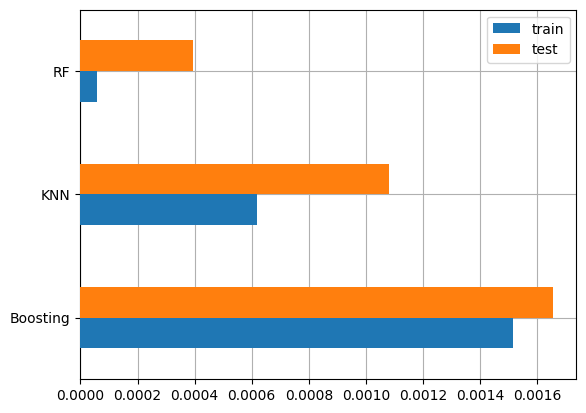

In [42]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [76]:
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10].values.ravel()}


for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pred_dict['prediksi_KNN'] = pred_dict['prediksi_KNN'].flatten()
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
0,0,0.0,0.0,0.3
1,3,3.0,3.0,3.3
2,5,4.2,4.9,3.9
3,2,2.6,2.0,4.0
4,0,0.0,0.0,0.3
